Author: Polina Lyubavina
Date: Aug 2
Lab: Movie Challenge Graph Analysis

# Movie Challenge (Graph Analysis)

In [1]:
# imports

import json
import networkx as nx 
import matplotlib.pyplot as plt

## Step 1: Ingest the Data

In [19]:
movies=[]
count=0

with open('imdbClean.json', errors="ignore") as file:
    for line in file:
        line = line.strip()
        if not line:
            continue
        try:
            movies.append(json.loads(line))
        except:
            pass
        count += 1

print("First movie: ", movies[0], "\n")
print("First movie: ", movies[1])

# print("Total errors converting to JSON: ", error_count)

First movie:  {'Title': 'Electric Shadows', 'Year': '2004', 'Rated': 'N/A', 'Released': '07 Apr 2005', 'Runtime': '93 min', 'Genre': 'Drama', 'Director': 'Jiang Xiao', 'Writer': 'Qingsong Cheng, Jiang Xiao', 'Actors': 'Yu Xia, Haibin Li, Yijing Zhang, Zhongyang Qi', 'Plot': 'For no apparent reason, a mute young woman assaults a youth who delivers water on his bicycle, injuring him and ruining his bike. Surprisingly, she asks him to feed her fish while she is in custody. Her tiny apartment, he discovers, is a shrine to his favorite escape, the movies. He finds her diary - a screenplay of her life built around scenes from favorite films - and it sets off his imagination. Maybe they have more in common than a love of the movies.', 'Language': 'Mandarin', 'Country': 'China', 'Awards': '4 wins & 1 nomination.', 'Poster': 'http://ia.media-imdb.com/images/M/MV5BMjE1NTg5MzY4MV5BMl5BanBnXkFtZTcwMDY5OTMzMQ@@._V1_SX300.jpg', 'Metascore': '70', 'imdbRating': '7.6', 'imdbVotes': '869', 'imdbID': 't

In [20]:
naMovies = [movie for movie in movies if "Country" in movie and "USA" in movie["Country"]]

print("Total number of movies: ", len(movies))
print("Total number of USA movies: ", len(naMovies))

Total number of movies:  115056
Total number of USA movies:  46592


In [21]:
from itertools import combinations

movieGraph = nx.Graph()

for movie in naMovies:
    actors = movie["Actors"].split(", ")
    
    combos = combinations(actors, 2)

    for c in combos: 
        n1 = c[0]
        n2 = c[1]
        movie_name = movie["Title"]
        movieGraph.add_edge(n1, n2, movieName=movie_name)

#debug
if len(movieGraph.edges) < 200: 
    plt.figure(figsize=(10, 10))
    pos.nx.spring_layot(movieGraph, k=0.25, iterations=20)
    nx.draw(movieGraph, with_labels=True, pos=pos)
    

Max number of costars:  278
Median number of costars is:  3


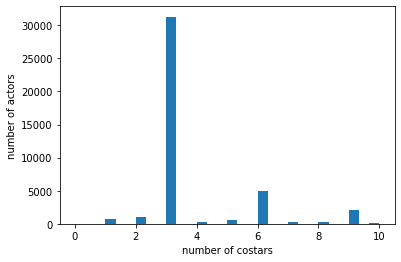

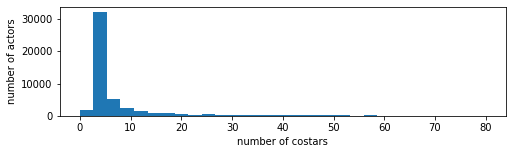

In [22]:
#using costars

from statistics import median

degrees = [ node[1] for node in nx.degree( movieGraph )]

plt.hist(degrees, bins=30, range=[0,10])
plt.xlabel("number of costars")
plt.ylabel("number of actors")

plt.figure(figsize=(8,2))
plt.hist(degrees, bins=30, range=[0,80])
plt.xlabel("number of costars")
plt.ylabel("number of actors")

print("Max number of costars: ", max(degrees))
print("Median number of costars is: ", median(degrees))


In [6]:
#who had the most costars

degrees = [ node for node in nx.degree(movieGraph)]

degrees = sorted(degrees, key=lambda x : x[1], reverse=True)

# print("degrees:", degrees[:10])

print("Top five: ")
for entry in degrees[:5]: 
    print(entry)

print()
print("Bottom five: ")
for entry in degrees[-5:]: 
    print(entry)



Top five: 
('John Wayne', 278)
('Harry Carey', 234)
('Lionel Barrymore', 216)
('Oliver Hardy', 209)
('Mickey Rooney', 206)

Bottom five: 
('James Ronald Whitney', 1)
('Melvin Just', 1)
('Danny Moumdjian', 1)
('Tony Scott', 1)
('Gloria Jean Merriex', 1)


## Step 2: Kevin Bacon

In [7]:
#number of movies

kb_degree = movieGraph.degree("Kevin Bacon")

kb_movies = [movie for movie in naMovies if "Kevin Bacon" in movie["Actors"]]

print("Kevin Bacon has number of costars: ", kb_degree)
print("Kevin Bacon number of movies: ", len(kb_movies))
# print(kb_movies)


Kevin Bacon has number of costars:  127
Kevin Bacon number of movies:  57


In [11]:
# path = nx.shortest_path(movieGraph, "Kevin Bacon", "Tom Cruise")

paths = [nx.shortest_path(movieGraph, "Kevin Bacon", actor)
            for actor in movieGraph.nodes
                if nx.has_path(movieGraph, "Kevin Bacon", actor)]

# print(paths)


number of separate actrors: 214


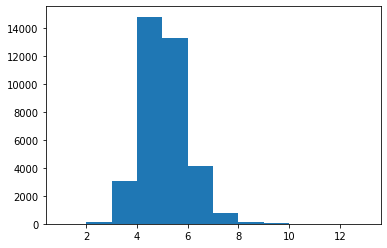

In [9]:
path_lengths = [len(p) for p in paths]

plt.hist(path_lengths, bins=12)

separate_actors = [p[-1] for p in paths if len(p) > 7]
print("number of separate actrors:", len(separate_actors))

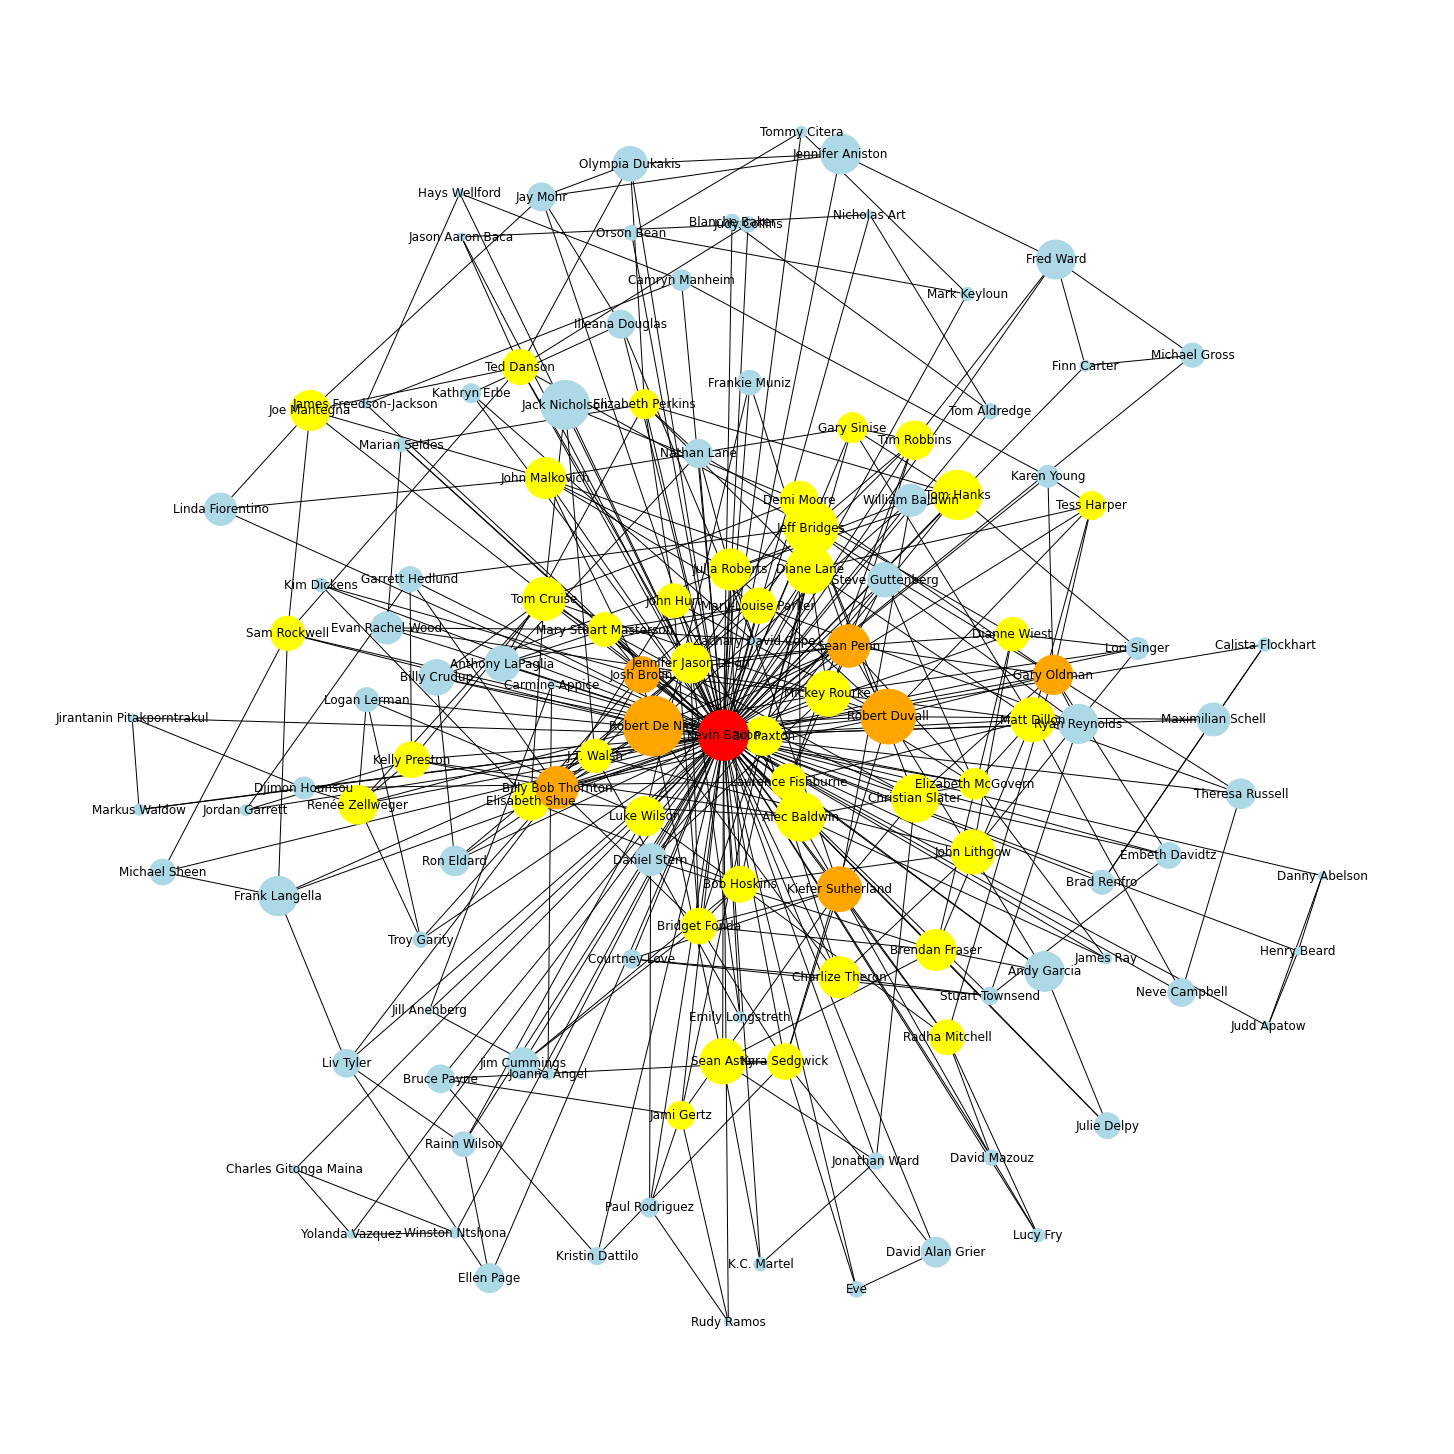

In [16]:
plt.figure(figsize=(20, 20))
neighbors = movieGraph.neighbors("Kevin Bacon")

# kevinGraph = nx.Graph()
# kevinGraph.add_nodes_from(nx.all_neighbors(actorGraph, 'Kevin Bacon'))
# where actorGraph == movieGraph

subgraph = movieGraph.subgraph(["Kevin Bacon"] + list(neighbors) )

node_size = []
for n in subgraph:
        degree = movieGraph.degree(n)
        node_size.append(degree * 20)

color_map = []
for node, val in subgraph.degree:
        if val > 100:
                color_map.append("red")
        elif val > 10:
                color_map.append("orange")
        elif val > 5:
                color_map.append("yellow")
        else:
                color_map.append("lightblue")

pos=nx.spring_layout(subgraph, k=0.25, iterations=20)
nx.draw(subgraph, pos=pos, with_labels=True, node_size=node_size, node_color=color_map)



